In [16]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import yfinance as yf

>MACD = 12-Period EMA − 26-Period EMA

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. 


In [17]:
Stk = yf.Ticker("SPY")
df = Stk.history(start='2016-01-01')
df.reset_index(level=0, inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-12-31,185.031928,185.717460,183.895370,183.895370,114877900,0.0,0
1,2016-01-04,180.846545,181.333631,179.132693,181.324615,222353500,0.0,0
2,2016-01-05,181.667361,182.118373,180.449639,181.631287,110845800,0.0,0
3,2016-01-06,178.907168,180.458648,178.239680,179.340149,152112600,0.0,0
4,2016-01-07,176.192125,178.095394,174.622600,175.037537,213436100,0.0,0
...,...,...,...,...,...,...,...,...
1381,2021-06-28,427.170013,427.649994,425.890015,427.470001,53159600,0.0,0
1382,2021-06-29,427.880005,428.559998,427.130005,427.700012,35970500,0.0,0
1383,2021-06-30,427.209991,428.779999,427.179993,428.059998,64827900,0.0,0
1384,2021-07-01,428.869995,430.600006,428.799988,430.429993,53441000,0.0,0


<AxesSubplot:xlabel='Date'>

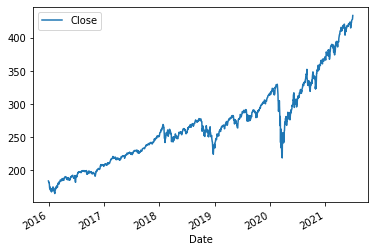

In [18]:
df.plot.line(x='Date', y='Close')

In [48]:
df_MACD = pd.DataFrame(data=df.Date)

df_MACD['EMA_12'] = df.Close.ewm(span=12).mean()
df_MACD['EMA_26'] = df.Close.ewm(span=26).mean()
df_MACD['MACD'] = df_MACD.EMA_12 - df_MACD.EMA_26
df_MACD['SIGNAL'] = df_MACD.MACD.ewm(span=9).mean()
df_MACD['MACD_Hist'] = df_MACD.MACD - df_MACD.SIGNAL
df_MACD

,Date,EMA_12,EMA_26,MACD,SIGNAL,MACD_Hist
0,2015-12-31,183.895370,183.895370,0.000000,0.000000,0.000000
1,2016-01-04,182.502878,182.560555,-0.057677,-0.032043,-0.025634
2,2016-01-05,182.162696,182.226678,-0.063982,-0.045133,-0.018850
3,2016-01-06,181.271728,181.419731,-0.148003,-0.079980,-0.068022
4,2016-01-07,179.577921,179.939674,-0.361753,-0.163801,-0.197952
...,...,...,...,...,...,...
1381,2021-06-28,423.070696,420.526393,2.544303,2.201965,0.342338
1382,2021-06-29,423.782899,421.057773,2.725126,2.306597,0.418529
1383,2021-06-30,424.440914,421.576456,2.864458,2.418169,0.446289
1384,2021-07-01,425.362311,422.232273,3.130037,2.560543,0.569494


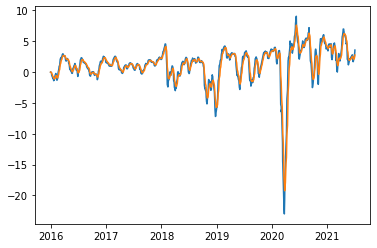

In [51]:
plt.plot(df_MACD.Date, df_MACD.MACD)
plt.plot(df_MACD.Date, df_MACD.SIGNAL)
